In [4]:
import numpy as np
from pathlib import Path
import pandas as pd

pd.set_option('display.max_rows', 15)

file = Path(r"C:\Users\Administrator\Desktop\pandas进阶修炼")

df = pd.read_csv(file.joinpath('某招聘网站数据.csv'), encoding='utf-8', parse_dates=['createTime'])
df.head()

,positionId,positionName,companyId,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,...,plus,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany
0,6802721,数据分析,475770,50-150人,"移动互联网,电商",A轮,"['绩效奖金', '带薪年假', '定期体检', '弹性工作']",产品|需求|项目类,数据分析,数据分析,...,NaN,0,0,0,NaN,NaN,0,0,[],False
1,5204912,数据建模,50735,150-500人,电商,B轮,"['年终奖金', '做五休二', '六险一金', '子女福利']",开发|测试|运维类,数据开发,建模,...,NaN,0,0,0,NaN,NaN,0,0,[],False
2,6877668,数据分析,100125,2000人以上,"移动互联网,企业服务",上市公司,"['节日礼物', '年底双薪', '股票期权', '带薪年假']",产品|需求|项目类,数据分析,数据分析,...,NaN,0,0,0,NaN,NaN,0,0,[],False
3,6496141,数据分析,26564,500-2000人,电商,D轮及以上,"['生日趴', '每月腐败基金', '每月补贴', '年度旅游']",开发|测试|运维类,数据开发,数据分析,...,NaN,0,0,0,NaN,NaN,0,0,[],True
4,6467417,数据分析,29211,2000人以上,物流丨运输,上市公司,"['技能培训', '免费班车', '专项奖金', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,...,NaN,0,0,0,NaN,NaN,0,0,[],True


In [6]:
# 分组
# 1- 分组统计 | 均值
# 计算各区（district)的薪资（salary）均值
df.groupby('district')['salary'].mean()

district
上城区    26250.000000
下沙     30000.000000
余杭区    33583.333333
拱墅区    28500.000000
江干区    25250.000000
滨江区    31428.571429
萧山区    36250.000000
西湖区    30893.939394
Name: salary, dtype: float64

In [9]:
# 2- 分组统计 | 取消索引
# 重新按照上一题要求进行分组，但不使用 district 做为索引
# df.groupby('district')['salary'].mean().reset_index()
df.groupby('district', as_index=False)['salary'].mean()

,district,salary
0,上城区,26250.000000
1,下沙,30000.000000
2,余杭区,33583.333333
3,拱墅区,28500.000000
4,江干区,25250.000000
5,滨江区,31428.571429
6,萧山区,36250.000000
7,西湖区,30893.939394


In [11]:
# 3- 分组统计 | 排序
# 计算并提取平均薪资最高的区域
# df.groupby('district', as_index=False)['salary'].mean().max()
df.groupby('district', as_index=False)['salary'].mean().sort_values('salary', ascending=False).head(1)

,district,salary
6,萧山区,36250.0


In [14]:
# 4- 分组统计 | 频率
# 计算不同行政区（district），不同规模工资（companySize）出现的次数
df.groupby(['district'])['companySize'].value_counts()

district  companySize
上城区       50-150人         2
下沙        150-500人        1
余杭区       2000人以上        14
          150-500人       13
          50-150人         7
                         ..
西湖区       2000人以上        11
          500-2000人       9
          150-500人        7
          50-150人         5
          15-50人          1
Name: count, Length: 21, dtype: int64

In [21]:
# 5- 分组统计 | 修改索引名
# 将上一题的索引名修改为
# - district -> 行政区
# - companySize -> 公司规模
pd.DataFrame(
    df.groupby(['district'])['companySize']
    .value_counts()
).rename_axis(["行政区", "公司规模"])

count
行政区 公司规模            
上城区 50-150人        2
下沙  150-500人       1
余杭区 2000人以上       14
    150-500人      13
    50-150人        7
...              ...
西湖区 2000人以上       11
    500-2000人      9
    150-500人       7
    50-150人        5
    15-50人         1

[21 rows x 1 columns]

In [23]:
# 6- 分组统计 | 计数
# 计算上一题，每个区域出现的公司数量
pd.DataFrame(
    df.groupby(['district'])['companyId']
    .count()
)

,companyId
district,
上城区,2
下沙,1
余杭区,36
拱墅区,4
江干区,4
滨江区,21
萧山区,4
西湖区,33


In [25]:
# 7- 分组查看 | 全部
df.groupby(['district', 'salary']).groups

{('上城区', 22500): [81], ('上城区', 30000): [97], ('下沙', 30000): [31], ('余杭区', 7500): [84], ('余杭区', 20000): [52, 103], ('余杭区', 22500): [23, 51], ('余杭区', 25000): [62], ('余杭区', 27500): [24, 49], ('余杭区', 29000): [93], ('余杭区', 30000): [4, 10, 13, 18, 59, 61, 65, 68, 74, 76, 86, 92, 94], ('余杭区', 35000): [101], ('余杭区', 37500): [0, 32, 38, 39, 41], ('余杭区', 40000): [60, 87], ('余杭区', 45000): [25], ('余杭区', 50000): [5, 64, 90], ('余杭区', 60000): [8, 82], ('拱墅区', 24000): [72], ('拱墅区', 30000): [54, 89, 96], ('江干区', 3500): [2], ('江干区', 22500): [45], ('江干区', 30000): [73], ('江干区', 45000): [3], ('滨江区', 7500): [83], ('滨江区', 15000): [1], ('滨江区', 20000): [21, 40], ('滨江区', 22500): [37], ('滨江区', 30000): [22, 53, 55, 58, 67, 80, 102], ('滨江区', 32500): [26], ('滨江区', 37500): [17, 28, 57, 77], ('滨江区', 42500): [91], ('滨江区', 45000): [43, 47], ('滨江区', 50000): [44], ('萧山区', 25000): [100], ('萧山区', 30000): [6], ('萧山区', 45000): [66, 69], ('西湖区', 6500): [71], ('西湖区', 20000): [12], ('西湖区', 21500): [104], ('西湖区', 22500): [48, 70

In [26]:
# 8- 分组查看 | 指定
# 将数据按照 district、salary 进行分组，并查看西湖区薪资为 30000 的工作
df.groupby(['district', 'salary']).get_group(('西湖区', 30000))


,positionId,positionName,companyId,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,...,plus,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany
11,6847013,大数据分析工程师(J11108),55046,2000人以上,"移动互联网,企业服务",上市公司,"['技能培训', '年底双薪', '带薪年假', '岗位晋升']",开发|测试|运维类,数据开发,数据分析,...,NaN,0,0,0,NaN,NaN,0,0,[],False
27,5520623,数据分析经理,19875,2000人以上,硬件,不需要融资,"['年终分红', '带薪年假', '年度旅游', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,...,NaN,0,0,0,NaN,NaN,0,0,[],True
33,6764017,数据分析师（社招）,13163,500-2000人,移动互联网,上市公司,"['绩效奖金', '股票期权', '年底双薪', '专项奖金']",产品|需求|项目类,数据分析,数据分析,...,NaN,0,0,0,NaN,NaN,0,0,[],True
34,6228290,商业数据分析师,509360,50-150人,"移动互联网,企业服务",B轮,"['定期体检', '帅哥多', '领导好', '美女多']",市场|商务类,市场|营销,商业数据分析,...,NaN,0,0,0,NaN,NaN,0,0,[],False
85,6792091,高级数据分析师,23252,500-2000人,移动互联网,上市公司,"['包午餐晚餐', '奖金多多多', '零食下午茶', '全员出国游']",产品|需求|项目类,数据分析,数据分析,...,NaN,0,0,0,NaN,NaN,0,0,[],False
88,6597345,资深数据分析师,57350,500-2000人,移动互联网,A轮,"['岗位晋升', '年度旅游', '年底双薪', '午餐补助']",产品|需求|项目类,数据分析,数据分析,...,NaN,0,0,0,NaN,NaN,0,0,[],False
98,6655562,数据分析建模工程师,117422215,50-150人,"数据服务,信息安全",A轮,"['午餐补助', '带薪年假', '16到18薪', '法定节假日']",开发|测试|运维类,人工智能,机器学习,...,NaN,0,0,0,NaN,NaN,0,0,[],False


In [38]:
# 9- 分组规则 | 通过匿名函数1
# 根据 createTime 列，计算每天不同 行政区 新增的岗位数量
df.groupby([df['createTime'].dt.day, 'district'])['positionId'].count().rename_axis(['发布日', '行政区'])

# pd.DataFrame(
#     df.groupby([df.createTime.apply(lambda x: x.day)])['district'].value_counts()
# )

发布日  行政区
9    余杭区     1
10   拱墅区     1
11   萧山区     1
     西湖区     1
12   上城区     1
            ..
16   拱墅区     2
     江干区     4
     滨江区    18
     萧山区     3
     西湖区    27
Name: positionId, Length: 21, dtype: int64

In [45]:
# 10- 分组规则 | 通过匿名函数2
# 计算各行政区的企业领域（indusryField）包含电商的总数
df.groupby('district', sort=False).apply(lambda x: x['industryField'].str.contains('电商').sum())

district
余杭区    9
滨江区    9
江干区    2
萧山区    3
西湖区    4
下沙     1
拱墅区    0
上城区    0
dtype: int64

In [48]:
# 11- 分组规则 | 通过内置函数
# 通过 positionName 的长度进行分组，并计算不同长度岗位名称的薪资均值
# df.groupby(df['positionName'].str.len())['salary'].mean()
df.set_index('positionName').groupby(len)['salary'].mean()

positionName
4     30125.000000
5     34083.333333
6     32954.545455
7     29816.666667
8     31875.000000
          ...     
17    40000.000000
18    25750.000000
19    45000.000000
21    21500.000000
23    60000.000000
Name: salary, Length: 18, dtype: float64

In [63]:
# 12 - 分组规则｜通过字典
# 将 score 和 matchScore 的和记为总分，与 salary 列同时进行分组，并查看结果

# df.groupby(['salary', df.eval('total1 = score + matchScore').total1]).groups
df.groupby({'salary':'薪资','score':'总分','matchScore':'总分'}, axis=1).sum()

,总分,薪资
0,248.101875,37500
1,208.559414,15000
2,94.972357,3500
3,80.874153,45000
4,78.755375,30000
...,...,...
100,0.314259,25000
101,0.283276,35000
102,0.256719,30000
103,0.281062,20000


In [66]:
# 13- 分组规则 | 通过多列
# 计算不同 工作年限（workYear）和 学历（education）之间的薪资均值
# pd.DataFrame(df['salary'].groupby([df['workYear'], df['education']]).mean())
pd.DataFrame(df.groupby(['workYear', 'education'])['salary'].mean())

salary
workYear education              
1-3年     不限         36250.000000
         本科         31000.000000
         硕士         36875.000000
3-5年     不限         30312.500000
         大专         28125.000000
         本科         31828.125000
5-10年    不限         26250.000000
         本科         28423.076923
不限       不限         35000.000000
         本科         35625.000000
应届毕业生    不限         32500.000000
         本科         33833.333333

In [72]:
# 14 - 分组转换｜ transform
# 在原数据框 df 新增一列，数值为该区的平均薪资水平
df['平均薪资水平'] = df[['district','salary']].groupby(['district']).transform('mean')
df[['district','salary', '平均薪资水平']]

,district,salary,平均薪资水平
0,余杭区,37500,33583.333333
1,滨江区,15000,31428.571429
2,江干区,3500,25250.000000
3,江干区,45000,25250.000000
4,余杭区,30000,33583.333333
...,...,...,...
100,萧山区,25000,36250.000000
101,余杭区,35000,33583.333333
102,滨江区,30000,31428.571429
103,余杭区,20000,33583.333333


In [73]:
# 分组过滤 | filter
# 提取平均工资小于 30000 的行政区的全部数据
df.groupby('district').filter(lambda x: x['salary'].mean() < 30000)

,positionId,positionName,companyId,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,...,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany,平均薪资水平
2,6877668,数据分析,100125,2000人以上,"移动互联网,企业服务",上市公司,"['节日礼物', '年底双薪', '股票期权', '带薪年假']",产品|需求|项目类,数据分析,数据分析,...,0,0,0,NaN,NaN,0,0,[],False,25250.0
3,6496141,数据分析,26564,500-2000人,电商,D轮及以上,"['生日趴', '每月腐败基金', '每月补贴', '年度旅游']",开发|测试|运维类,数据开发,数据分析,...,0,0,0,NaN,NaN,0,0,[],True,25250.0
45,6684619,金融数据分析师,26564,500-2000人,电商,D轮及以上,"['生日趴', '每月腐败基金', '每月补贴', '年度旅游']",开发|测试|运维类,数据开发,数据分析,...,0,0,0,NaN,NaN,0,0,[],True,25250.0
54,6046775,数据分析专家,133429,50-150人,"移动互联网,消费生活",未融资,"['年底双薪', '专项奖金', '美女多', '弹性工作']",产品|需求|项目类,高端产品职位,数据分析专家,...,0,0,0,NaN,NaN,0,0,[],False,28500.0
72,6794326,BI数据分析师,374014,500-2000人,"移动互联网,金融",B轮,"['弹性工作', '扁平管理', '领导好', '五险一金']",产品|需求|项目类,数据分析,BI,...,0,0,0,NaN,NaN,0,0,[],False,28500.0
73,6819289,数据分析师,28103,2000人以上,"消费生活,硬件",上市公司,"['定期体检', '五险一金', '专项奖金', '骨干家庭公寓']",产品|需求|项目类,数据分析,数据分析,...,0,0,0,NaN,NaN,0,0,[],True,25250.0
81,6602399,商业数据分析师（阿里数据银行）,100858,50-150人,"移动互联网,广告营销",天使轮,"['节日礼物', '带薪年假', '绩效奖金', '五险一金']",市场|商务类,市场|营销,商业数据分析,...,0,0,0,NaN,NaN,0,0,[],False,26250.0
89,6655791,数据分析,289890,500-2000人,其他,未融资,[],产品|需求|项目类,数据分析,数据分析,...,0,0,0,NaN,NaN,0,0,[],False,28500.0
96,6767669,数据分析专员,92417,2000人以上,"移动互联网,广告营销",上市公司,"['节日礼物', '股票期权', '带薪年假', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,...,0,0,0,NaN,NaN,0,0,[],False,28500.0
97,6718750,旅游大数据分析师（杭州）,122019,50-150人,"数据服务,企业服务",A轮,"['年底双薪', '股票期权', '午餐补助', '定期体检']",开发|测试|运维类,数据开发,数据治理,...,0,0,0,NaN,NaN,0,0,[],False,26250.0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Songti SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Songti SC
d:\python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22478 (\N{CJK UNIFIED IDEOGRAPH-57CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Generic family 'sans-serif' not found because none of the following families were found: Songti SC
d:\python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4

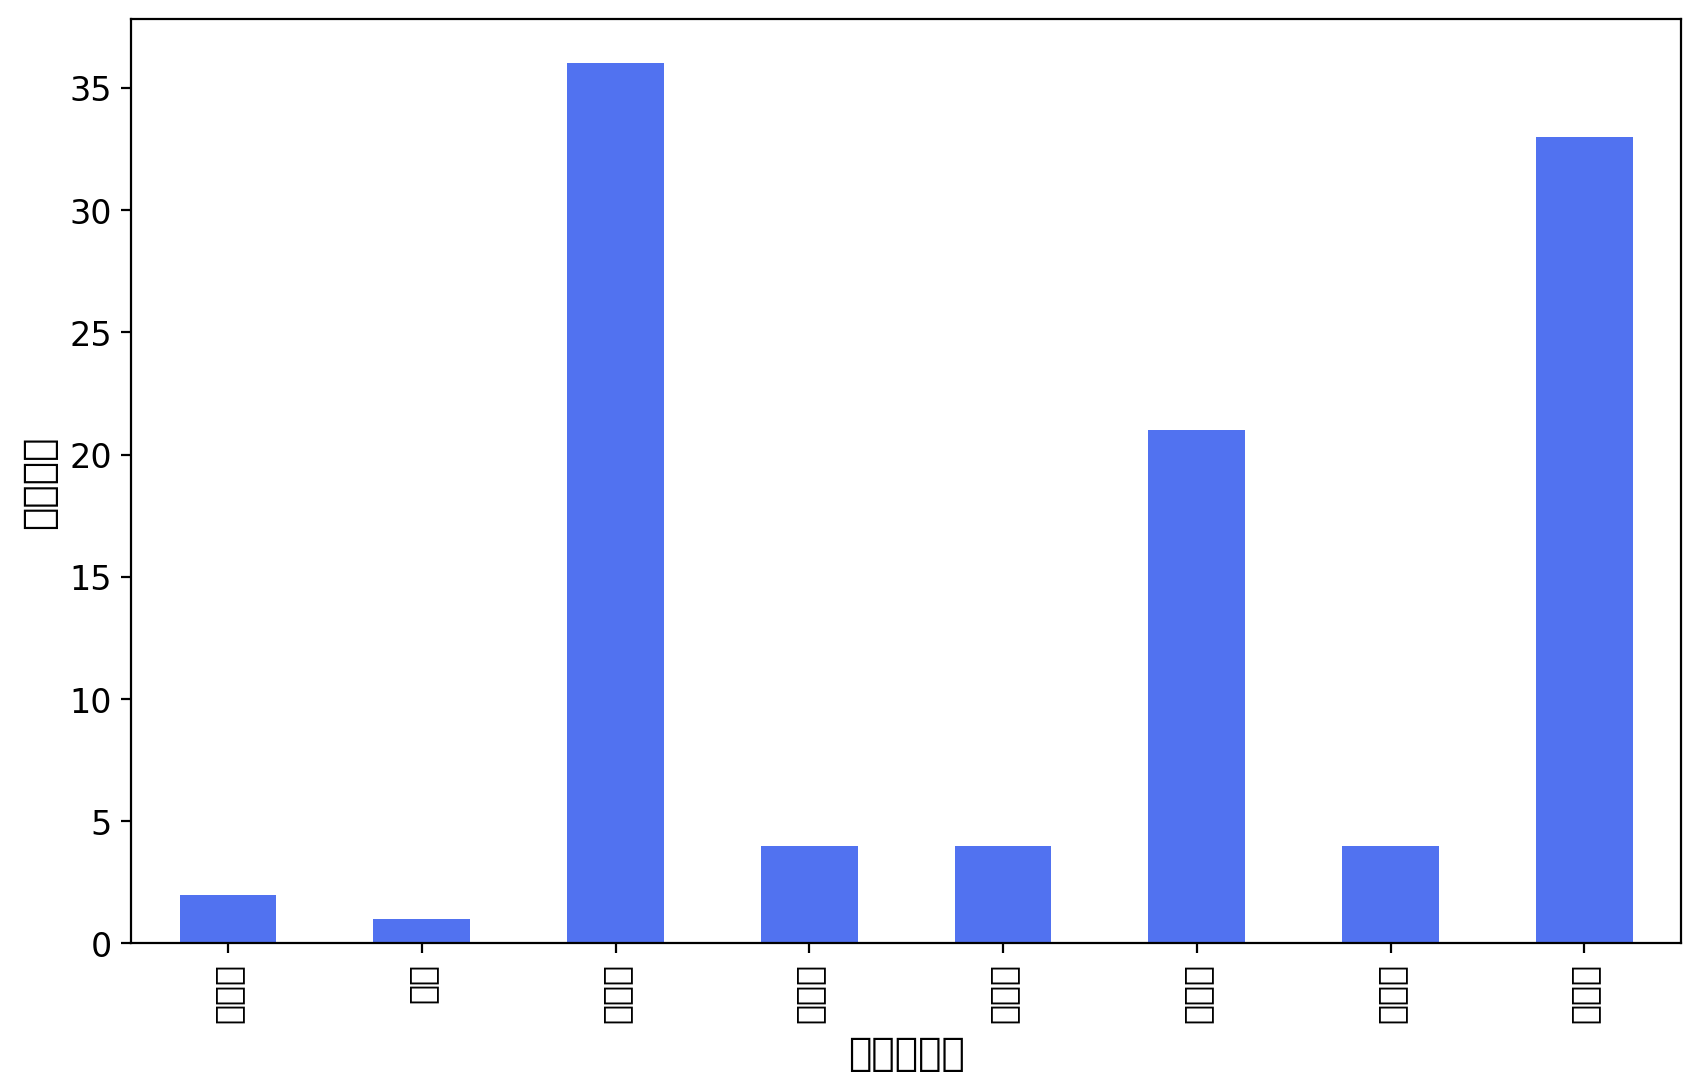

In [76]:
# 16 - 分组可视化
# 对杭州市各区公司数量进行分组，并使用柱状图进行可视化
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'retina'
# plt.rcParams['font.sans-serif'] = ['Songti SC']

df.groupby("district")['positionName'].count().plot(
    kind='bar', figsize=(10, 6), color='#5172F0', fontsize=12)

plt.ylabel("公司数量",fontsize = 14)
plt.xlabel("杭州市各区",fontsize = 14)

plt.show()

In [78]:
# 17-聚合统计
# 分组计算不同行政区域，薪水的最小值，最大值和平均值
df.groupby('district')['salary'].agg(['min', 'max', 'mean'])

,min,max,mean
district,,,
上城区,22500,30000,26250.000000
下沙,30000,30000,30000.000000
余杭区,7500,60000,33583.333333
拱墅区,24000,30000,28500.000000
江干区,3500,45000,25250.000000
滨江区,7500,50000,31428.571429
萧山区,25000,45000,36250.000000
西湖区,6500,45000,30893.939394


In [102]:
# 18 - 聚合统计｜修改列名
# 将上一题的列名（包括索引名）修改为中文
# pd.DataFrame(df.groupby('district')['salary'].agg(['min', 'max', 'mean'])).rename({'max':'最高工资'}, axis=1)

# (
#     df.groupby('district')['salary']
#     .agg(['min', 'max', 'mean'])
#     .rename(columns={'min': '最低工资'})
# )
(
    df.groupby('district')
    .agg(最低工资=('salary', 'min'), 最高工资=('salary', 'max'), 平均工资=('salary', 'mean'))
    .rename_axis(['行政区'])
)

,最低工资,最高工资,平均工资
行政区,,,
上城区,22500,30000,26250.000000
下沙,30000,30000,30000.000000
余杭区,7500,60000,33583.333333
拱墅区,24000,30000,28500.000000
江干区,3500,45000,25250.000000
滨江区,7500,50000,31428.571429
萧山区,25000,45000,36250.000000
西湖区,6500,45000,30893.939394


In [103]:
# 19- 聚合统计 | 组合
# 对不同岗位(positionName)进行分组，并统计其薪水(salary)中位数和得分(score)均值
# df.groupby('positionName')[['salary', 'score']].agg(['median', 'mean'])
df.groupby('positionName').agg({'salary': np.median, 'score': np.mean})

,salary,score
positionName,,
BI数据分析师,20000.0,2.666667
bi数据分析师,40000.0,5.000000
业务与数据分析师,30000.0,3.000000
产品经理/数据分析（核心业务）-2020届春招,60000.0,3.000000
产品运营（偏数据分析）,27500.0,15.000000
...,...,...
金融数据分析师,22500.0,5.000000
银行数据分析岗,50000.0,5.000000
高级数据分析专员,22500.0,4.000000


In [106]:
# 20 -聚合统计｜多层
# 对不同行政区进行分组，并统计薪水的均值、中位数、方差，以及得分的均值
df.groupby('district').agg({'salary': [np.mean, np.median, np.std], 'score':np.mean})

salary                             score
                  mean   median           std       mean
district                                                
上城区       26250.000000  26250.0   5303.300859   2.000000
下沙        30000.000000  30000.0           NaN   6.000000
余杭区       33583.333333  30000.0  10857.847721  15.166667
拱墅区       28500.000000  30000.0   3000.000000   2.750000
江干区       25250.000000  26250.0  17255.433927  39.250000
滨江区       31428.571429  30000.0  10445.436461  12.952381
萧山区       36250.000000  37500.0  10307.764064  18.250000
西湖区       30893.939394  30000.0   7962.566302   8.060606

In [107]:
# 21 - 聚合统计｜自定义函数
# 在 18 题基础上，在聚合计算时新增一列计算最大值与平均值的差值
def myfunc(x):
    return x.max()-x.mean()

df.groupby('district').agg(最低工资=('salary', 'min'), 
                           最高工资=('salary', 'max'), 
                           平均工资=('salary', 'mean'), 
                           最大值与均值差值=('salary', myfunc)).rename_axis(["行政区"])

,最低工资,最高工资,平均工资,最大值与均值差值
行政区,,,,
上城区,22500,30000,26250.000000,3750.000000
下沙,30000,30000,30000.000000,0.000000
余杭区,7500,60000,33583.333333,26416.666667
拱墅区,24000,30000,28500.000000,1500.000000
江干区,3500,45000,25250.000000,19750.000000
滨江区,7500,50000,31428.571429,18571.428571
萧山区,25000,45000,36250.000000,8750.000000
西湖区,6500,45000,30893.939394,14106.060606
